# Import Libraries

In [1]:
from src.Agent import Agent
from src.Game import SnakeGameAI
from src.helper import plot
import os

pygame 2.1.2 (SDL 2.0.18, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Training

<Figure size 432x288 with 0 Axes>

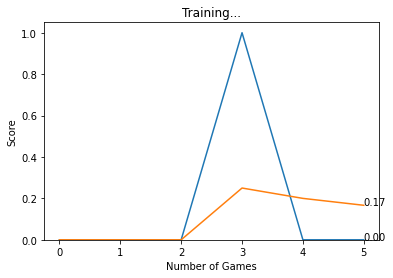

In [ ]:
plot_scores = []
plot_mean_scores = []
total_score = 0
record = 0
epsilons = []
game = SnakeGameAI(UI=False)
agent = Agent(double_dqn=True, dueling_dqn=True, game=game)
#agent.load_model('model.pth')

episode = 0
NUM_EPISODES = 2000
while episode < NUM_EPISODES:
    state = agent.get_observation()
    action = agent.choose_action(state)
    reward, done, score = agent.game.play_step(action)
    new_state = agent.get_observation()
    # remember
    agent.remember(state, action, reward, new_state, done)
              
    if done:
        episode += 1
        # train long memory, plot result
        agent.game.reset()
          
        states, actions, rewards, new_states, dones = agent.get_memory_sample()
        agent.learn(states, actions, rewards, new_states, dones)

        if score > record:
            record = score
            agent.save_model('model_double_dueling_dqn.pth')

            

        plot_scores.append(score)
        total_score += score
        mean_score = total_score / agent.number_episodes
        plot_mean_scores.append(mean_score)
        #print('Game', agent.n_games, 'Score', score, 'Record:', record, 'Mean Score: ', mean_score)
        plot(plot_scores,plot_mean_scores)
            


agent.game.end_game()